<a href="https://colab.research.google.com/github/ayush2005k/Deepfake-Detection/blob/main/Deepfake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install mtcnn
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path
# import mtcnn
from mtcnn.mtcnn import MTCNN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/glob2/fnmatch.py:141: SyntaxWarning: invalid escape sequence '\Z'
  return '(?ms)' + res + '\Z'


In [ ]:
from mtcnn.mtcnn import MTCNN


In [ ]:
import cv2
import os

def extract_multiple_videos(input_filenames, image_path_infile):
    """Extract video files into a sequence of images."""

    os.makedirs(image_path_infile, exist_ok=True)
    i = 1  # Global frame counter

    # Loop through each video file
    for video_file in input_filenames:
        cap = cv2.VideoCapture(video_file)

        if not cap.isOpened():
            print(f"Error opening file: {video_file}")
            continue

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            image_path = os.path.join(image_path_infile, f"{i}.jpg")
            cv2.imwrite(image_path, frame)
            i += 1

        cap.release()

    cv2.destroyAllWindows()


In [1]:
from google.colab import files
uploaded = files.upload()


Saving download (3).jpg to download (3).jpg
Saving download (2).jpg to download (2).jpg


In [3]:
import os

fake_image_path_for_frame = "/content/dataset/fake"
real_image_path_for_frame = "/content/dataset/real"

os.makedirs(fake_image_path_for_frame, exist_ok=True)
os.makedirs(real_image_path_for_frame, exist_ok=True)



In [ ]:
import shutil

shutil.move("download (2).jpg", fake_image_path_for_frame)
shutil.move("download (3).jpg", real_image_path_for_frame)


In [7]:
fake_images = [os.path.join(fake_image_path_for_frame, f)
               for f in os.listdir(fake_image_path_for_frame)]

real_images = [os.path.join(real_image_path_for_frame, f)
               for f in os.listdir(real_image_path_for_frame)]


In [8]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [9]:
def compare_images(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    fig = plt.figure(title)
    plt.suptitle(f"MSE: {m:.2f}, SSIM: {s:.2f}")

    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap="gray")
    plt.axis("off")

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap="gray")
    plt.axis("off")

    plt.show()


In [16]:

import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


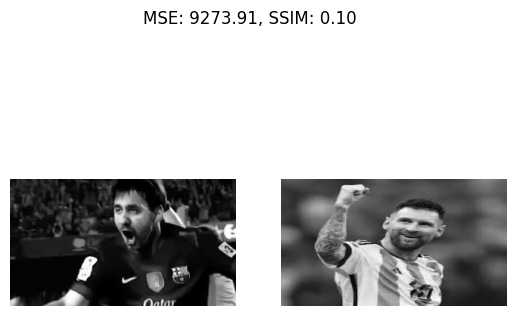

In [17]:
fake_img = cv2.imread(fake_images[0], cv2.IMREAD_GRAYSCALE)
real_img = cv2.imread(real_images[0], cv2.IMREAD_GRAYSCALE)

# Resize to same shape (IMPORTANT)
real_img = cv2.resize(real_img, (fake_img.shape[1], fake_img.shape[0]))

compare_images(fake_img, real_img, "Fake vs Real Image Comparison")
